# 02-02 텐서 조작하기(Tensor Manipulation) 1

## 1. Vector, Matrix, Tensor

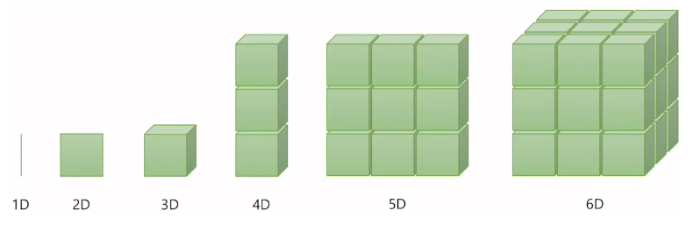

+ 1차원으로 구성된 값을 우리는 **벡터**라고 합니다.

+ 2차원으로 구성된 값을 **행렬(Matrix)**라고 합니다. 
+ 그리고 3차원이 되면 우리는 **텐서(Tensor)**라고 부릅니다

### 2D Tensor
크기 **|t|=(batch_size, dimension)**  
+ ex. 훈련데이터 하나의 크기 256라면,  [3,1,2,5,...]  
  벡터의 차원 = 256  
+ 훈련데이터가 3000개라면, 훈련 데이터의 크기 = 3000 x 256  
+ 64개씩 처리한다면, 컴푸터가 한번에 처리하는 2D tensor의 크기는 **batch x dim = 64 x 256**

### 3D Tensor - Vision  
**|t|=(batch, width, height)**

### 3D Tensor - NLP  
**|t|=(batch, length, dim)**  
(배치사이즈, 문장 길이, 단어벡터의 차원)  
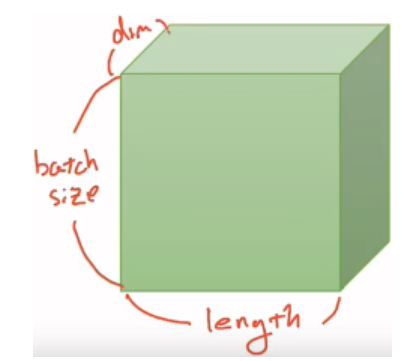  

In [1]:
# NLP 분야의 3D 텐서 예제로 이해하기
strings=[['나는 사과를 좋아해'],
         ['나는 바나나를 좋아해'],
         ['나는 사과를 싫어해'], 
         ['나는 바나나를 싫어해']]

## 단어별로 split -> 4x3 2D Tensor
words=[['나는', '사과를', '좋아해'],
         ['나는', '바나나를', '좋아해'],
         ['나는', '사과를', '싫어해'], 
         ['나는', '바나나를', '싫어해']]

## 단어를 3차원 벡터로
vectors={'나는' : [0.1, 0.2, 0.9],
        '사과를' : [0.3, 0.5, 0.1],
        '바나나를' : [0.3, 0.5, 0.2],
        '좋아해' : [0.7, 0.6, 0.5],
        '싫어해' : [0.5, 0.6, 0.7]}

words2vectors=[]
for string in words:
  temp=[]
  for w in string:
    temp.append(vectors[w])
  words2vectors.append(temp)

words2vectors

[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

+ 훈련데이터 크기 = 4x3x3 3D Tensor (batch,length,dim)

In [2]:
batch1 = words2vectors[:2]
batch2 = words2vectors[2:]

batch1

[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

+ |t|=2x3x3 batch x 문장길이 x 단어벡터의 차원

## 2. 넘파이로 텐서 만들기

In [3]:
import numpy as np

### 1D with Numpy

In [4]:
t=np.array([0.,1.,2.,3.,4.,5.,6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [5]:
print(f't.ndim : {t.ndim}')
print(f't.shape : {t.shape}')

t.ndim : 1
t.shape : (7,)


+ 1차원은 벡터, 2차원은 행렬, 3차원은 3차원 텐서였습니다.  
+ **(7, )**는 (1, 7)을 의미합니다. 다시 말해 (1 × 7)의 크기를 가지는 벡터입니다.

### 2D with Numpy

In [6]:
t=np.array([[1.,2.,3.,],
            [4.,5.,6.],
            [7.,8.,9.],
            [10.,11.,12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [7]:
print(f't.ndim : {t.ndim}') #2
print(f't.shape : {t.shape}') #4x3

t.ndim : 2
t.shape : (4, 3)


## 3. PyTorch Tensor Allocation

In [8]:
import torch

### 1D with PyTorch

In [9]:
t=torch.FloatTensor([0.,1.,2.,3.,4.,5.,6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print(f't.dim : {t.dim()}') #1
print(f't.shape : {t.shape}')
print(f't.size : {t.size()}')

t.dim : 1
t.shape : torch.Size([7])
t.size : torch.Size([7])


In [11]:
print(t[0],t[1],t[-1]) # 0/ 1/ 6
print(t[2:5],t[4:-1]) # 2,3,4/ 4,5
print(t[:2],t[3:]) # 0,1/ 3,4,5,6

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


### 2D with PyTorch

In [14]:
t=torch.FloatTensor([[1.,2.,3.],
                     [4.,5.,6.],
                     [7.,8.,9.],
                     [10.,11.,12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [16]:
print(f't.dim : {t.dim()}') #2
print(f't.shape : {t.shape}') #4x3
print(f't.size : {t.size()}')

t.dim : 2
t.shape : torch.Size([4, 3])
t.size : torch.Size([4, 3])


In [18]:
print(t[:,1]) # 전체 row, 2nd col
print(t[:,1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [19]:
print(t[:,:-1]) # 전체 row, -2까지의 col
print(t[:,:-1].size()) #4x2

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])
torch.Size([4, 2])


### Broadcasting

In [24]:
m1=torch.FloatTensor([[3,3]])
m2=torch.FloatTensor([[2,2]])
print(m1+m2)

tensor([[5., 5.]])


In [25]:
# Vector + Scalar
m1=torch.FloatTensor([[1,2]])
m2=torch.FloatTensor([3]) # [3] -> [3,3]
print(m1+m2)

tensor([[4., 5.]])


In [26]:
# Vector + Vector
m1=torch.FloatTensor([[1,2]]) #1x2 [1,2] -> [[1,2],
                              #              [1,2]]
m2=torch.FloatTensor([[3],
                      [4]]) #2x1   [[3], -> [[3,3],
                            #       [4]]     [4,4]]
print(m1+m2)     

tensor([[4., 5.],
        [5., 6.]])


### 자주 사용되는 기능

In [29]:
# Matrix Multiplication 
m1=torch.FloatTensor([[1,2],[3,4]]) 
m2=torch.FloatTensor([[1],[2]])
print(f'Shape of M1: {m1.shape}')
print(f'Shape of M2: {m2.shape}')

print(m1.matmul(m2)) #2x1

Shape of M1: torch.Size([2, 2])
Shape of M2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [31]:
# Multiplication - element-wise
m1=torch.FloatTensor([[1,2],[3,4]])
m2=torch.FloatTensor([[1],[2]])
print(f'Shape of M1: {m1.shape}')
print(f'Shape of M2: {m2.shape}')

print(m1*m2) #m2가 broadcasting 된다 [[1],  -> [[1,1],
print(m1.mul(m2)) #                   [2]]      [2,2]]

Shape of M1: torch.Size([2, 2])
Shape of M2: torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [32]:
# Mean
t=torch.FloatTensor([1,2])
print(t.mean())

tensor(1.5000)


In [33]:
t=torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [35]:
print(t.mean(dim=0)) # 행(0)을 없앤다 : 2x2 -> 1x2

tensor([2., 3.])


In [36]:
print(t.mean(dim=1)) # 열(1)을 없앤다 : 2x2 -> 2x1

tensor([1.5000, 3.5000])


In [37]:
print(t.mean(dim=-1)) # 마지막 차원을 없앤다 : 2x2 -> 2x1

tensor([1.5000, 3.5000])


In [44]:
t=torch.FloatTensor([[[1,1],[2,2,]],
                     [[3,3],[4,4]]])

print(t)
print(f'Shape of t : {t.shape}')
print(f'dim of t : {t.dim()}')

tensor([[[1., 1.],
         [2., 2.]],

        [[3., 3.],
         [4., 4.]]])
Shape of t : torch.Size([2, 2, 2])
dim of t : 3


In [49]:
print(t[0,:,:]) # 0번째 dim : depth
print(t[:,0,:]) # 1번째 dim : row
print(t[:,:,0]) # 2번째 dim : col

tensor([[1., 1.],
        [2., 2.]])
tensor([[1., 1.],
        [3., 3.]])
tensor([[1., 2.],
        [3., 4.]])


In [50]:
print({t.mean(dim=0)}) # 2x2x2 -> 1x2x2
print({t.mean(dim=1)}) # 2x2x2 -> 2x1x2
print({t.mean(dim=2)}) # 2x2x2 -> 2x2x1

{tensor([[2., 2.],
        [3., 3.]])}
{tensor([[1.5000, 1.5000],
        [3.5000, 3.5000]])}
{tensor([[1., 2.],
        [3., 4.]])}


In [51]:
# Sum
t=torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [52]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [53]:
# Max & ArgMax
t=torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [54]:
print(t.max())

tensor(4.)


In [57]:
print(t.max(dim=0))
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


In [56]:
print(f'Max : {t.max(dim=0)[0]}')
print(f'Argmax : {t.max(dim=0)[1]}')

Max : tensor([3., 4.])
Argmax : tensor([1, 1])
